# Homework

---

## Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*

## Q1. Answer
    
    
We see from the plots below that after a few initial steps, the chains converge (in distribution) to some posterior distribution. We showed the means and standard deviations as the important statistics, and 95% confidence intervals of the posterior distributionsfor further comparison with Question 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Question 1

# loc is mean and scale is standard deviation
# Set the random seed
np.random.seed(2025)
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
xbar = np.mean(x)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization

for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a= n/2, scale=np.sum((x-theta[c,g-1])**2)/2).rvs(size=1)
        theta[c,g] = stats.norm(loc=xbar, scale=1/np.sqrt(n*tau[c,g])).rvs(size=1)
                

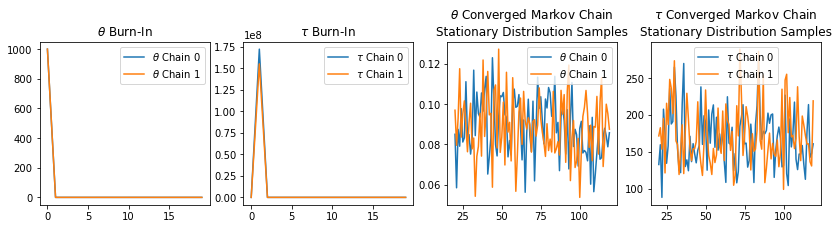

In [2]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

In [3]:
print(np.mean(x))
print(np.std(x)/np.sqrt(n))

print(np.mean(theta[0,burn:G]))
print(np.std(theta[0,burn:G]))

print(np.mean(theta[1,burn:G]))
print(np.std(theta[1,burn:G]))

print(np.mean(tau[0,burn:G]))
print(np.std(tau[0,burn:G]))

print(np.mean(tau[1,burn:G]))
print(np.std(tau[1,burn:G]))

0.09053948208672588
0.15847440642982047
0.09026644295973524
0.014460891166822164
0.0906732276053704
0.014570038001645566
169.79813122549282
44.21482445611504
169.00729383340908
43.88781880879726


In [5]:
print(f"95% confidence interval for theta:[{np.percentile(theta[0,burn:G], 0.25)},{np.percentile(theta[0,burn:G], 97.5)}]")
print(f"95% confidence interval for tau:[{np.percentile(tau[0,burn:G], 0.25)},{np.percentile(tau[0,burn:G], 97.5)}]")

95% confidence interval for theta:[0.04812441760476176,0.11842953465978408]
95% confidence interval for tau:[75.22763472909548,269.53358219567497]


### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*

## Q2. Answer

When $p(\theta)$ is $N(\theta_0, \tau_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$, we have

$$\begin{align*}
p\left(x|\theta,\tau=\frac{1}{\sigma^2}\right) = {} & \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} \exp(-\frac{\tau}{2}(x_i-\theta)^2)\\
p(\theta,\tau) \propto{} & \sqrt{\frac{\tau_0}{2\pi}}\exp(-\frac{\tau_0}{2}(\theta-\theta_0)^2)\times \tau^{\alpha/2-1}\exp(-\frac{\lambda}{2}\tau)\\
p(\theta,\tau, x) \propto {} & \tau^{n/2} \exp(-\frac{\tau}{2} \sum_{i=1}^n (x_i-\theta)^2)\times \sqrt{\frac{\tau_0}{2\pi}}\exp(-\frac{\tau_0}{2}(\theta-\theta_0)^2)\times \tau^{\alpha/2-1}\exp(-\frac{\lambda}{2}\tau)
\end{align*}$$

therefore 
$$\begin{align*}
p(\tau|\theta, x) \propto{} & \tau^{n/2} \exp(-\frac{\tau}{2} \sum_{i=1}^n (x_i-\theta)^2)\times \tau^{\alpha/2-1}\exp(-\frac{\lambda}{2}\tau)\\
p(\tau|\theta, x) = {} & \text{Gamma}\left(\alpha = \frac{n+\alpha}{2}, \beta= \frac{1}{2} \sum_{i=1}^n (x_i-\theta)^2 +\frac{\lambda}{2}\right)\\
\end{align*}$$

and $$\begin{align*}
p(\theta| \tau, x)  \propto {} & \exp(-\frac{n\tau}{2}\theta^2+n\tau\bar{x}\theta-\frac{\tau_0}{2}\theta^2+\tau_0\theta_0\theta)\\
p(\theta| \sigma^2 = \tau^{-1}, x) = {} & N\left(E[\theta] = \frac{\bar x+\tau_0\theta_0/(n\tau)}{1+\tau_0/(n\tau)}, Var(\theta) = \frac{1}{n\tau+\tau_0}\right)
\end{align*}$$


We see that the parameter $\tau_0$ plays the role of prior sample variance of and $\theta_0$ plays the role of prior sample mean of $x$. It is weighted as one additional sample in the posterior distribution of $\theta$

$\alpha$ plays the role of prior sample size and $\lambda $ plays the role of prior sample variance of $\tau$ 


We see from the plots and print-outs that the means and standard deviations of the posertior distributions of $\theta,\tau$ are different from what we obtained in Question 1, after we modified the prior distribution, especially when we chose a large $\alpha$ parameter.

The 95% confidence intervals for $\theta$ has roughly the same mean, but very different width compared with that in Question 1.

The 95% confidence intervals for $\tau$ has very different mean and width compared with that in Question 1.

In [6]:
## Question 2

# loc is mean and scale is standard deviation
# Set the random seed
np.random.seed(2025)
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
xbar = np.mean(x)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization

## prior parameters
alpha = 60.
n_alpha = (n+alpha)/2
lam = 2.
tau0 = 1.
theta0 = 1.

for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a= n_alpha, scale=np.sum((x-theta[c,g-1])**2)/2+lam/2).rvs(size=1)
        theta[c,g] = stats.norm(loc=(xbar+tau0*theta0/n/tau[c,g])/(1+tau0/n/tau[c,g]), scale=1/np.sqrt(n*tau[c,g]+tau0)).rvs(size=1)
                

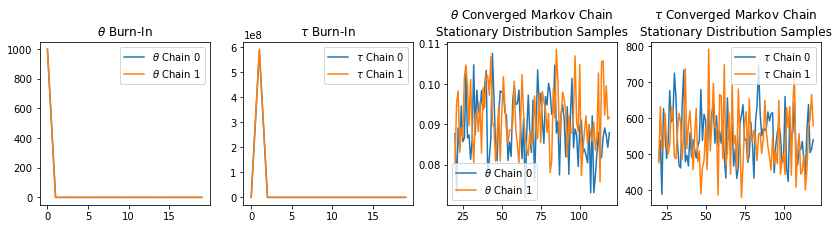

In [7]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

In [8]:
print(np.mean(x))
print(np.std(x)/np.sqrt(n))

print(np.mean(theta[0,burn:G]))
print(np.std(theta[0,burn:G]))

print(np.mean(theta[1,burn:G]))
print(np.std(theta[1,burn:G]))

print(np.mean(tau[0,burn:G]))
print(np.std(tau[0,burn:G]))

print(np.mean(tau[1,burn:G]))
print(np.std(tau[1,burn:G]))

0.09053948208672588
0.15847440642982047
0.09051787817150744
0.007917297312691984
0.0906061543858878
0.007782695800400338
553.3566796993898
82.45306594630357
553.4424287227503
83.88247338241432


In [9]:
print(f"95% confidence interval for theta:[{np.percentile(theta[0,burn:G], 0.25)},{np.percentile(theta[0,burn:G], 97.5)}]")
print(f"95% confidence interval for tau:[{np.percentile(tau[0,burn:G], 0.25)},{np.percentile(tau[0,burn:G], 97.5)}]")

95% confidence interval for theta:[0.06802928688331351,0.10624721279218238]
95% confidence interval for tau:[354.6687206349299,728.4914677149845]


### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and besides the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



## Q3. Answer

### (B) General Cases

Given the likelihood $p(\textbf{x}|\boldsymbol{\theta})$ and the prior $p(\boldsymbol{\theta})$, the joint distribution is $p(\textbf{x},\boldsymbol{\theta})=p(\textbf{x}|\boldsymbol{\theta})\times p(\boldsymbol{\theta})$. Therefore the posterior distribution is $p(\boldsymbol{\theta}|\textbf{x})=\frac{p(\textbf{x},\boldsymbol{\theta})}{p(\textbf{x})}$, where $p(\textbf{x})=\int p(\textbf{x},\boldsymbol{\theta})d\boldsymbol{\theta}$ is the marginal distribution of $\textbf{x}$, and the integration becomes summation in the case of a discrete distribution and a Lebesgue integration for general distributions.

Assume that the posterior distribution is proper, i.e., $p(\textbf{x})=\int p(\textbf{x},\boldsymbol{\theta})d\boldsymbol{\theta}<\infty$, since $p(\textbf{x})$ does not depend on $\boldsymbol{\theta}$, we conclude that $p(\boldsymbol{\theta}|\textbf{x})\propto p(\textbf{x},\boldsymbol{\theta})$. The posterior distribution is proportional to the joint distribution, in the sense that the proportional "constant" could depend on $\textbf{x}$ in general. 

Therefore in many cases we do not need to calculate $p(\textbf{x})=\int p(\textbf{x},\boldsymbol{\theta})d\boldsymbol{\theta}$. Rather, we observe $p(\textbf{x},\boldsymbol{\theta})$ and look at the parts that depend on $\boldsymbol{\theta}$, the we can recognize the posterior distribution of $\boldsymbol{\theta}$


The point that we often use the conjugate distribution is that the conjugate distribution of the prior distribution makes the posterior distribution of $\boldsymbol{\theta}$ lie in the same family of the prior distribution. Therefore we update the posterior distribution by simply update the parameters of the family, rather than finding a new type of posterior distribution for every new data. And we can usually find some meaningful "prior information/sample statstics" interpretation of the parameters of the prior distribution by observing the role of sample statistics in the parameters of the posterior distribution. 